# Import packages

In [ ]:
import sys
import plotly
import numpy as np
import pandas as pd
!pip install CensusData
import censusdata
# import censusdata
from matplotlib import pyplot as plt


     |████████████████████████████████| 23.2MB 174kB/s 
  Created wheel for CensusData: filename=CensusData-1.8-cp36-none-any.whl size=24706120 sha256=324c98931f583425ce66b59dd4ccbf9293fbb314e229d9127dc2f32b7feead30
  Stored in directory: /root/.cache/pip/wheels/76/04/a7/086077b0f4dee8f4c81dc16389b84a1add31d6626f3e0985fd
Successfully built CensusData


# Import packages

In [ ]:
import sys
import plotly
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
from matplotlib import pyplot as plt


In [ ]:
print("hello world")
print(sys.version_info)

hello world
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)


# COVID-19 Project – The Socially Distanced



Research questions:

1) What conditions predict a second wave of COVID-19 infections in a population center?

- Suggestion: What characteristics predict spikes in a second wave of COVID-19 infection in a population center? 

2) Which populations centers can expect a second wave imminently? 

Response variable:

Break into two groups of population centers: 2nd wave and NO 2nd wave. The basis for the categorization should be on the 14-day moving average of new cases per day

Predictive variables:

Disease:

    1) Recovered cases per population

    2) Deaths per population AND/OR deaths per positive cases

    3) Prior hospitalization rate

    4) Prior ICU rate

Testing and Tracing:

    1) Tests conducted per population

    2) Is there a way to quantify tracing protocols or workforce?

Interventions:

    1) Severity level of intervention (create as ordinal factor or dummy variable for different measures in place)

    2) Duration of intervention actions

    3) School closure?

Population Demographics:

    1) Population size AND/OR Population density

    2) Median age

    3) Median income

    4) Racial composition

    5) Transportation statistic (ie airport size)



# Introduction 

Give brief and general background of the task. 


In [ ]:
#@title Load the covid data and show head
url = 'https://raw.githubusercontent.com/wlbit666/datathon/af0e7c4af155d646480d5e44da2fb1ce20e8bb53/covid_19_data.csv'
df1 = pd.read_csv(url)
df1.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
#@title stats of data

df1.describe()

,SNo,Confirmed,Deaths,Recovered
count,95284.000000,95284.000000,95284.000000,9.528400e+04
mean,47642.500000,14891.445594,679.052433,7.978379e+03
std,27506.265862,45115.751441,2691.086601,4.518395e+04
min,1.000000,0.000000,0.000000,0.000000e+00
25%,23821.750000,171.000000,2.000000,1.000000e+00
50%,47642.500000,1547.000000,29.000000,2.620000e+02
75%,71463.250000,7967.250000,254.000000,2.702250e+03
max,95284.000000,765670.000000,42072.000000,2.053699e+06


In [ ]:
groupedby_date = df1.groupby(['ObservationDate'])
worldSum_perDay = groupedby_date.sum()
worldSum_perDay.head()

,SNo,Confirmed,Deaths,Recovered
ObservationDate,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0


In [ ]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fM' % (x*1e-6)

def thousands(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fK' % (x*1e-3)

formatter = FuncFormatter(millions)
formatter2 = FuncFormatter(thousands)

symp_data = pd.DataFrame(np.array([['Fever', 87.9], ['Dry cough', 67.7], 
                                   ['Fatigue', 38.1], ['Sputum production', 33.4], 
                                   ['Shortness of breath', 18.6], ['Muscle Pain', 14.8], 
                                   ['Sore throat', 13.9], ['Headache', 13.6], 
                                   ['Chills', 11.4], ['Nausea', 5], 
                                   ['Nasal congestion', 4.8], ['Diarrhea', 3.7]]), 
                         columns=['Symptom', 'percentage'])
symp_data

,Symptom,percentage
0,Fever,87.9
1,Dry cough,67.7
2,Fatigue,38.1
3,Sputum production,33.4
4,Shortness of breath,18.6
5,Muscle Pain,14.8
6,Sore throat,13.9
7,Headache,13.6
8,Chills,11.4
9,Nausea,5


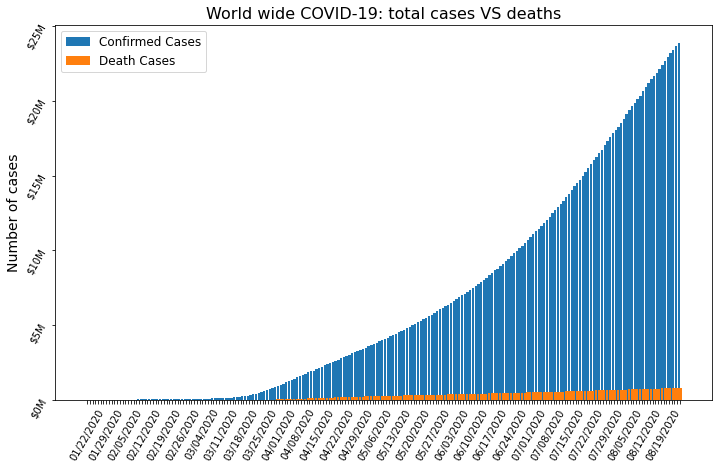

In [ ]:
date = worldSum_perDay.index
confirmed_case = worldSum_perDay['Confirmed']
death_case = worldSum_perDay['Deaths']

x = np.arange(len(date))  # the label locations
width = 0.85  # the width of the bars

f, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, confirmed_case, width, label='Confirmed Cases')
rects2 = ax.bar(x + width/2, death_case, width, label='Death Cases')

ax.set_ylabel('Number of cases', fontsize=14)
ax.set_title('World wide COVID-19: total cases VS deaths', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(date)
plt.rc('ytick',labelsize=14)

n = 7  # Keeps every 7th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]


ax.legend(prop={'size': 12})

f.tight_layout()
ax.yaxis.set_major_formatter(formatter)
ax.tick_params(rotation=60)

plt.show()

In [ ]:
us_data = df1[df1['Country/Region']=='US']
us_groupedby_date = us_data.groupby(['ObservationDate'])
usSum_perDay = us_groupedby_date.sum()


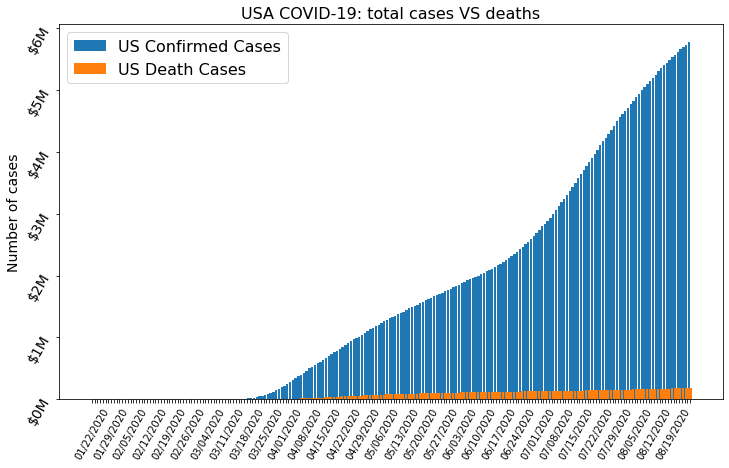

In [ ]:
us_date = usSum_perDay.index
us_confirmed_case = usSum_perDay['Confirmed']
us_death_case = usSum_perDay['Deaths']

x = np.arange(len(us_date))  # the label locations
width = 0.85  # the width of the bars

f, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, us_confirmed_case, width, label='US Confirmed Cases')
rects2 = ax.bar(x + width/2, us_death_case, width, label='US Death Cases')

ax.set_ylabel('Number of cases', fontsize=14)
ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True, useOffset=False))
ax.set_title('USA COVID-19: total cases VS deaths', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(us_date)
plt.rc('ytick',labelsize=16)

n = 7  # Keeps every 7th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

f.tight_layout()
ax.tick_params(rotation=60)
ax.legend(prop={'size': 16})
ax.yaxis.set_major_formatter(formatter)

plt.show()

In [ ]:
region_sum = df1[df1['ObservationDate']=='08/25/2020']
region_sum_grouped = region_sum.groupby(['Country/Region']).sum()
region_sum_sorted = region_sum_grouped.sort_values('Confirmed', ascending=False)
top10_regions = region_sum_sorted.head(10)
top10_regions

,SNo,Confirmed,Deaths,Recovered
Country/Region,,,,
US,5510798,5777710.0,178486.0,2053699.0
Brazil,2564840,3669995.0,116580.0,3032551.0
India,3514419,3224547.0,59357.0,2458339.0
Russia,7886642,963655.0,16524.0,777960.0
South Africa,94683,613017.0,13308.0,520381.0
Peru,2468961,600438.0,27813.0,414577.0
Mexico,3040006,568621.0,61450.0,469206.0
Colombia,3133261,562113.0,17889.0,395463.0
Spain,1897602,412553.0,28924.0,150376.0


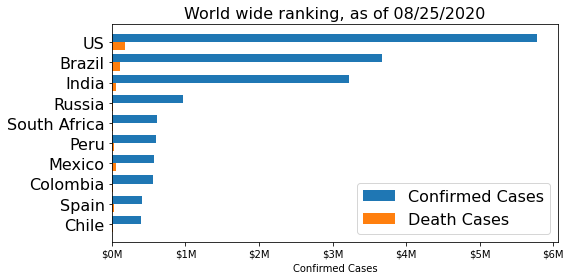

In [ ]:
regions = top10_regions.index
y_pos = np.arange(len(regions))
confirmed_case = top10_regions['Confirmed']
deaths = top10_regions['Deaths']

fig, ax = plt.subplots(figsize=(8, 4))
width = 0.4
# ax.barh(y_pos, confirmed_case, align='center')
rects1 = ax.barh(y_pos - width/2, confirmed_case, width, label='Confirmed Cases')
rects2 = ax.barh(y_pos + width/2, deaths, width, label='Death Cases')

ax.set_yticks(y_pos)
ax.set_yticklabels(regions)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Confirmed Cases')
ax.set_title('World wide ranking, as of 08/25/2020', fontsize=16)

plt.rc('xtick',labelsize=16)
ax.xaxis.set_major_formatter(formatter)
ax.legend(prop={'size': 16})

plt.show()

In [ ]:
us_state = region_sum[region_sum['Country/Region']=='US']

us_state_sorted = us_state.sort_values('Confirmed', ascending=False)
top10_states = us_state_sorted.head(10)
top10_states

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
94785,94786,08/25/2020,California,US,2020-08-26 04:28:11,681032.0,12382.0,0.0
94849,94850,08/25/2020,Florida,US,2020-08-26 04:28:11,605502.0,10580.0,0.0
95199,95200,08/25/2020,Texas,US,2020-08-26 04:28:11,604328.0,11935.0,0.0
95050,95051,08/25/2020,New York,US,2020-08-26 04:28:11,430774.0,32918.0,0.0
94862,94863,08/25/2020,Georgia,US,2020-08-26 04:28:11,258354.0,5262.0,0.0
94907,94908,08/25/2020,Illinois,US,2020-08-26 04:28:11,224887.0,8126.0,0.0
94742,94743,08/25/2020,Arizona,US,2020-08-26 04:28:11,199273.0,4792.0,0.0
95047,95048,08/25/2020,New Jersey,US,2020-08-26 04:28:11,190021.0,15953.0,0.0
95061,95062,08/25/2020,North Carolina,US,2020-08-26 04:28:11,157741.0,2570.0,0.0
95197,95198,08/25/2020,Tennessee,US,2020-08-26 04:28:11,145417.0,1628.0,0.0


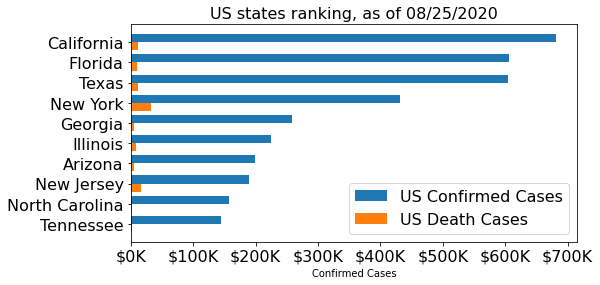

In [ ]:
states = top10_states['Province/State']
y_pos = np.arange(len(states))
confirmed_case = top10_states['Confirmed']
deaths = top10_states['Deaths']

fig, ax = plt.subplots(figsize=(8, 4))

width = 0.4
rects1 = ax.barh(y_pos - width/2, confirmed_case, width, label='US Confirmed Cases')
rects2 = ax.barh(y_pos + width/2, deaths, width, label='US Death Cases')
#ax.barh(y_pos, confirmed_case, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(states)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Confirmed Cases')
ax.set_title('US states ranking, as of 08/25/2020', fontsize=16)
plt.rc('xtick',labelsize=16)
ax.xaxis.set_major_formatter(formatter2)
ax.legend(prop={'size': 16})

plt.show()

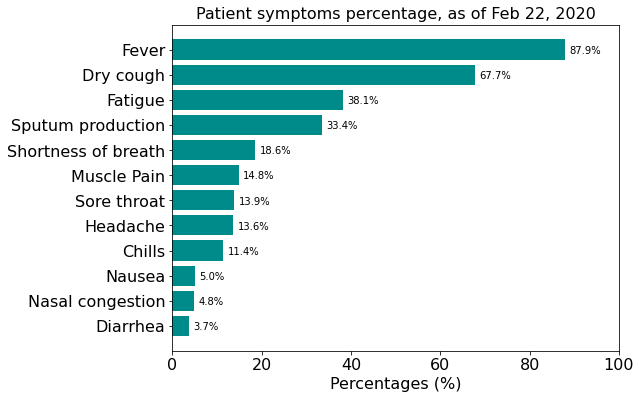

In [ ]:
symps = symp_data['Symptom']
y_pos = np.arange(len(symps))
percentage1 = symp_data['percentage'].astype(float)

fig, ax = plt.subplots(figsize=(8, 6))

width = 0.4
ax.barh(y_pos, percentage1, align='center', color="darkcyan")
ax.set_yticks(y_pos)
ax.set_yticklabels(symps)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentages (%)', fontsize=16)
ax.set_title('Patient symptoms percentage, as of Feb 22, 2020', fontsize=16)
#plt.rc('xtick',labelsize=16)
for i, v in enumerate(percentage1):
    ax.text(v + 1, i + .15, str(v)+str('%'))
plt.xlim(right=100) 
plt.show()

In [ ]:
import folium

In [ ]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

df_confirmed.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,76,76,76,82,82,82,86,86,91,91,91,91,91,92,92,92,92,92,92,92,92,92,92,92,93,93,93,93,93,94,94,94,94,94,94,94,94,94,94,94
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,136118,141900,148027,153520,158334,162526,167416,173355,178996,185373,191302,196543,201919,206743,213535,220682,228195,235677,241811,246499,253868,260911,268574,276072,282437,289100,294569,299126,305966,312659,320884,329043,336802,342154,350867,359638,370188,380292,392009,401239
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35254,35693,36162,36613,36996,37317,37390,37629,37937,38196,38550,38841,39050,39102,39298,39586,39819,39985,40185,40410,40433,40593,40794,41023,41299,41495,41663,41701,41846,42056,42319,42477,42616,42792,42825,42936,43067,43270,43451,43626
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,3614,3633,3640,3654,3668,3685,3699,3718,3736,3756,3773,3784,3797,3809,3820,3832,3842,3851,3861,3875,3897,3915,3927,3936,3945,3950,3957,3959,3966,3971,3972,3981,3985,3988,3991,3997,4006,4019,4033,4040


In [ ]:
import math

world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>" + df_confirmed.iloc[i]['Country/Region'] + "</h5>"+
        "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirmed.iloc[i]['Province/State']))+"</div>"+
        "<hr style='margin:10px;'>"+
        "<ul style='color: #333;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>",
        #radius=(int((math.log(df_confirmed.iloc[i,-1]+1.0000000001, 1.0001))))*5,
        radius=int(df_confirmed.iloc[i,-1])/2,
        color='#ff4600',
        fill_color='#ff6666',
        fill=True).add_to(world_map)

world_map

Section 2


In [ ]:
'''retrieve county level data from the Census data package
 
 the American Community Survey?
The ACS started in 2005 and replaced the long form Census that used to be sent every ten years to a subset of households along with the traditional Census. 
Instead, the ACS is conducted on a rolling basis and sent to roughly 3.5 million households each month. 
This subset is then used to create estimates of the entire population.
The questions on the ACS are also more in-depth and include topics like education, employment and internet access.

ACS 5-year estimates (2005–2009 to 2014–2018) Data for all areas, highest resolution and largest sample size but the least current
https://www.census.gov/programs-surveys/acs/guidance/estimates.html


B00001_001:total population
B00002_001:number of housing units
B01003_001: total population ( could be a duplicate)
B01002_001: median age
C07001_031: moved from different county within same state
C07001_041: moved from different state
B07101_004: Movers to different state
B07101_003: movers within the same state





 '''

 county_level_census_db=censusdata.download('acs5', 2018, censusdata.censusgeo([('county', '*')]),
                                   ['B01001_001E',])



IndentationError: ignored